In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
gen_path = 'Data'
print(list(os.listdir(f'{gen_path}/genres_original')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [30]:
y,sr = librosa.load(f'{gen_path}/genres_original/jazz/jazz.00027.wav')

# here y is sequence of vibrations in varying pressure
# sr is the no. of samples of audio carried per second. nyquist rate.

print('y', y, '\n')
print('y shape:' , np.shape(y) , '\n')
print('Sample Rate (hz):' , sr , '\n')
# verify length of the audio
print('Check Len of Audio: ' , np.shape(y)[0] / sr)

y [ 0.01651001  0.02923584  0.03015137 ... -0.00790405 -0.00375366
  0.01220703] 

y shape: (661794,) 

Sample Rate (hz): 22050 

Check Len of Audio:  30.013333333333332


In [6]:
# trim leading and trailing silence from an audio signal (silence
# before and after the actual audio)

audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File :' , audio_file , '\n')
print('Audio File shape:' , np.shape(audio_file))

Audio File : [ 0.01651001  0.02923584  0.03015137 ... -0.00790405 -0.00375366
  0.01220703] 

Audio File shape: (661794,)


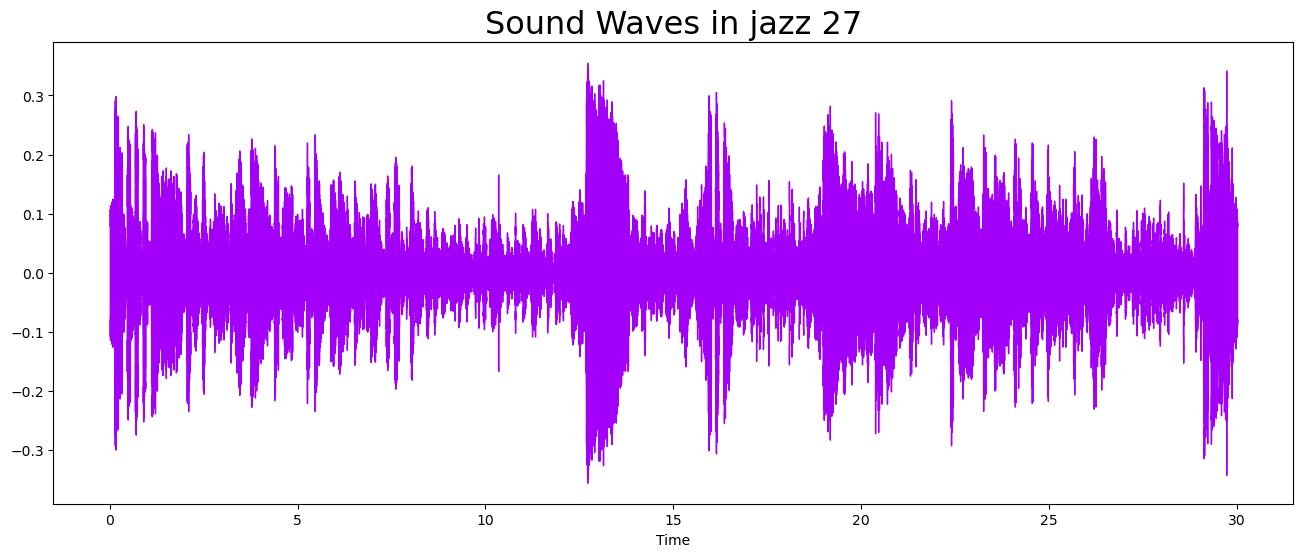

In [7]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file , sr = sr , color = '#A300F9');
plt.title('Sound Waves in jazz 27' , fontsize = 23);
plt.show()

In [8]:
# default fft window size
n_fft = 2048 #FFT window size
hop_length = 512 
# number of audio frame b/w STFT columns.
# short-time fourier transform (STFT)
D = np.abs(librosa.stft(audio_file , n_fft = n_fft, hop_length = hop_length))

print('shape of D object' , np.shape(D))

shape of D object (1025, 1293)


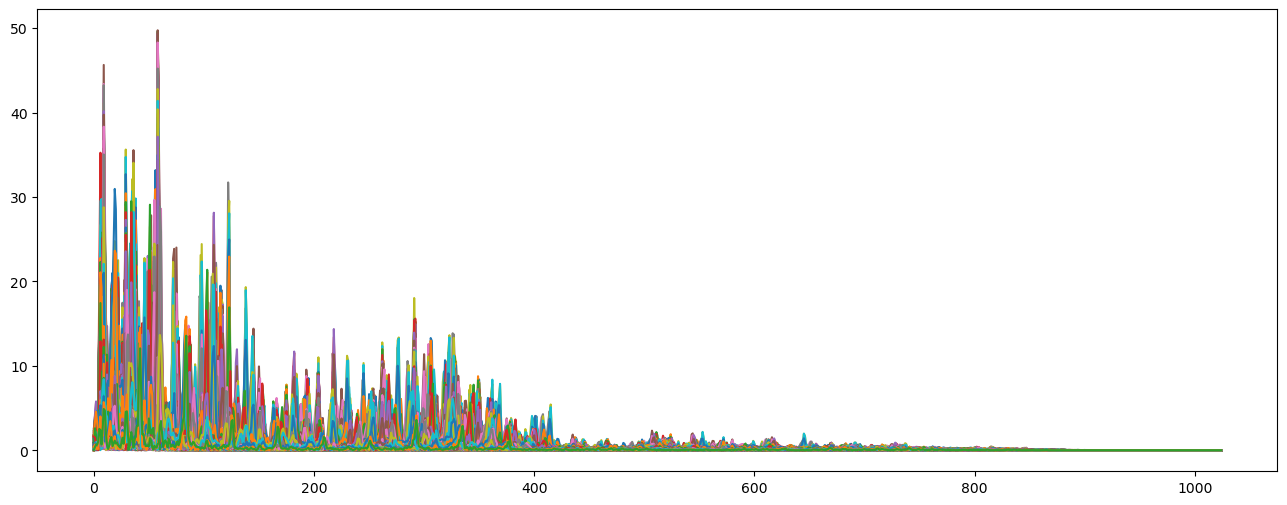

In [9]:
plt.figure(figsize = (16,6))
plt.plot(D);
plt.show()

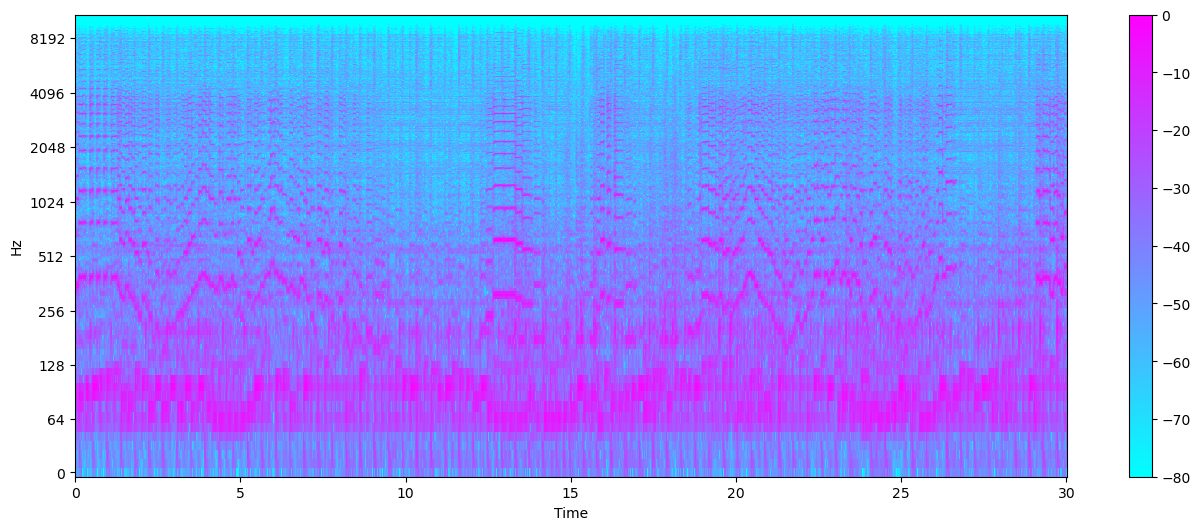

In [10]:
# convert an amplitude spectogram to Decibels-scaled spectograms.

DB = librosa.amplitude_to_db(D , ref = np.max)
# Creating the spectogram

plt.figure(figsize = (16,6))
librosa.display.specshow(DB , sr = sr , hop_length = hop_length , x_axis = 'time' , y_axis = 'log' , cmap = 'cool')
plt.colorbar();
plt.show();


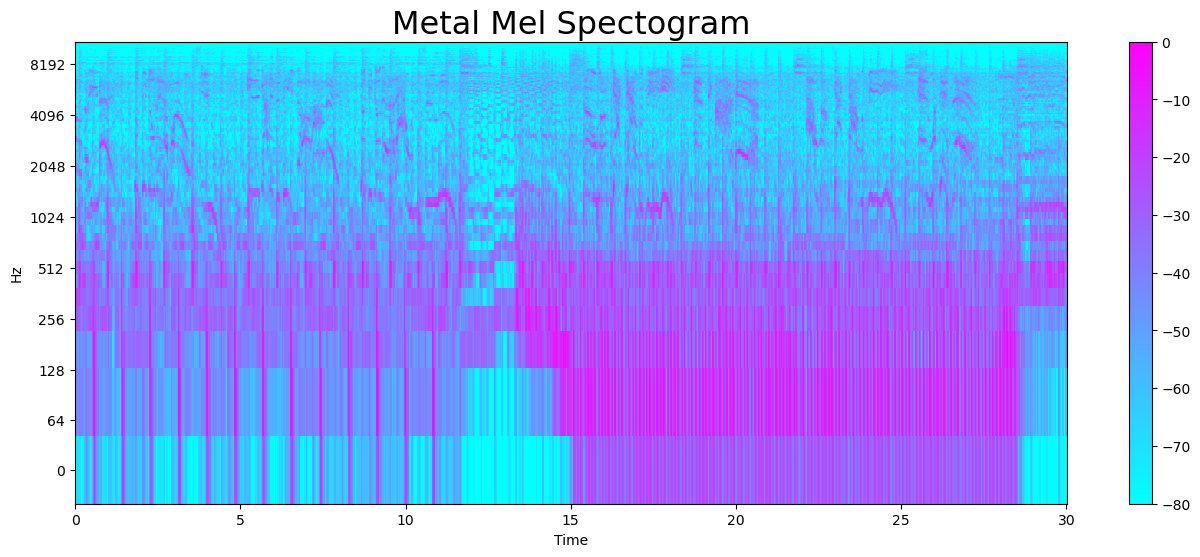

In [11]:
y,sr = librosa.load(f'{gen_path}/genres_original/metal/metal.00036.wav')
y, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y=y,sr = sr , hop_length = hop_length)
S_DB = librosa.amplitude_to_db(S, ref = np.max)
plt.figure(figsize = (16,6))
librosa.display.specshow(S_DB , sr = sr , hop_length = hop_length , x_axis  = 'time' , y_axis = 'log' , cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectogram" , fontsize = 23);
plt.show()

In [12]:
pip install --upgrade librosa

Note: you may need to restart the kernel to use updated packages.


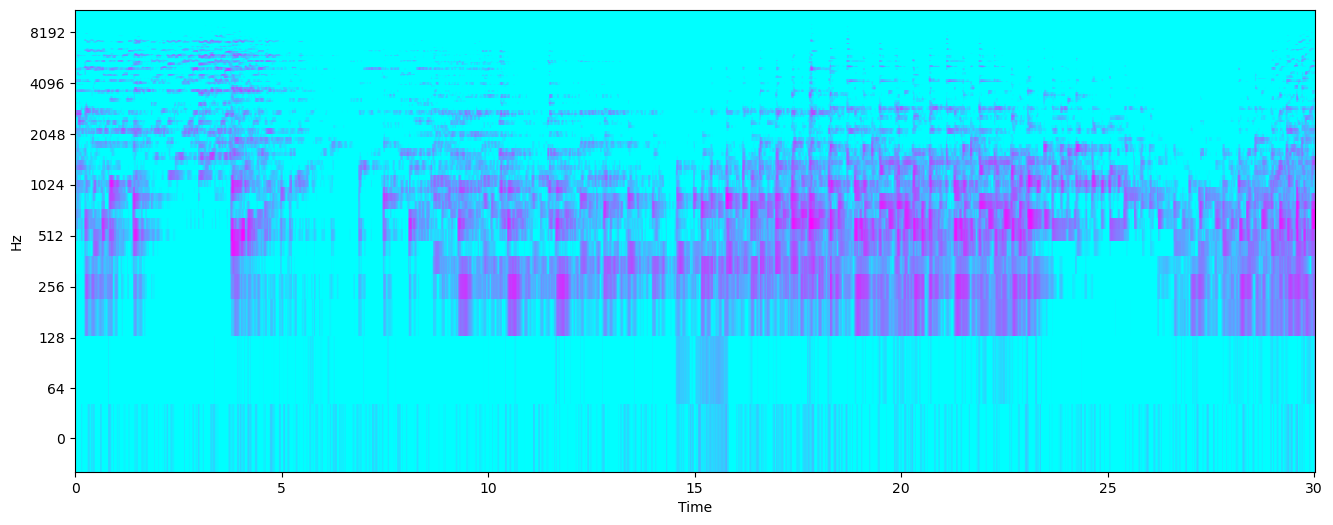

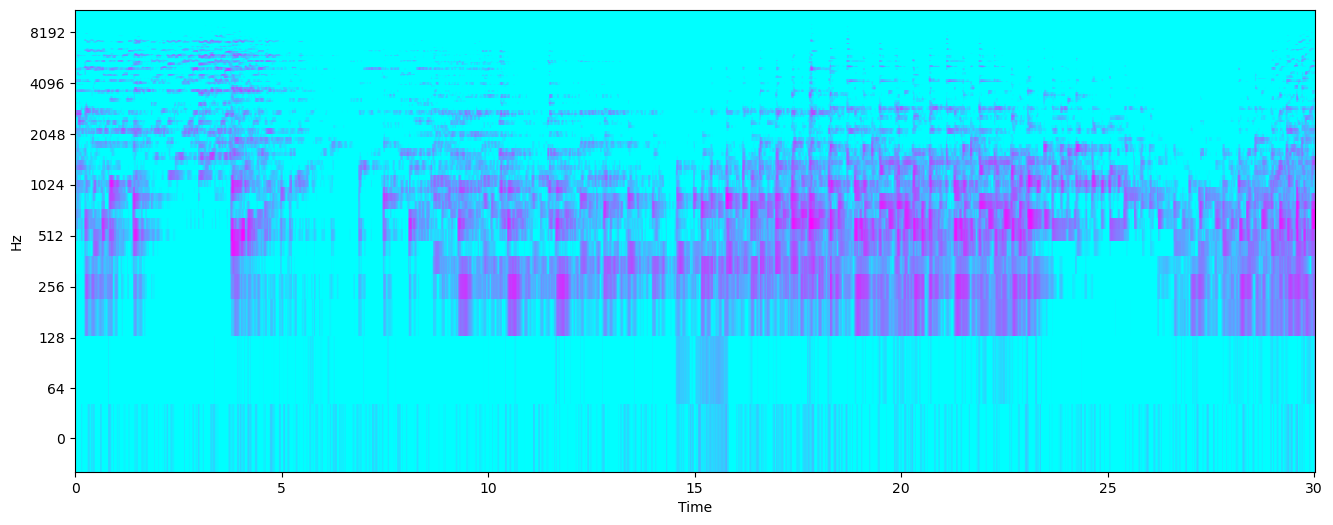

In [16]:
# another one.
y1, sr = librosa.load(f'{gen_path}/genres_original/classical/classical.00035.wav')
y, _ = librosa.effects.trim(y1)

S = librosa.feature.melspectrogram(y=y , sr = sr)
S_DB = librosa.amplitude_to_db(S,ref = np.max)
plt.figure(figsize = (16,6))
librosa.display.specshow(S_DB , sr = sr , hop_length = hop_length ,
                         x_axis = 'time' , y_axis = 'log' , cmap = 'cool');
plt.show()


In [18]:
# Zero Crossing Rate
zero_crossings = librosa.zero_crossings(audio_file , pad = False)
print(sum(zero_crossings))

41556


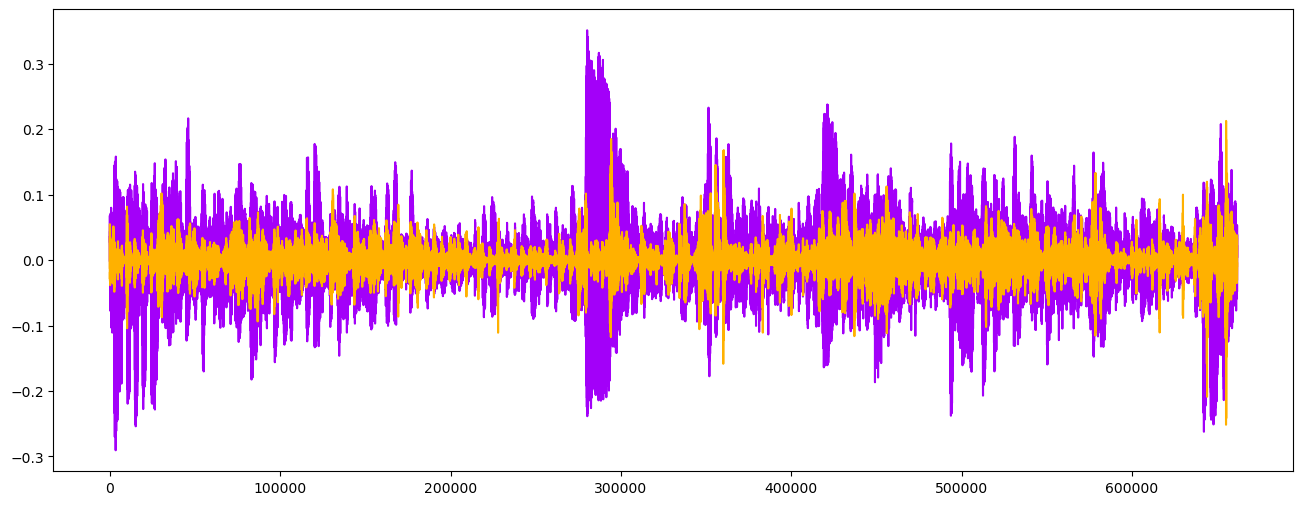

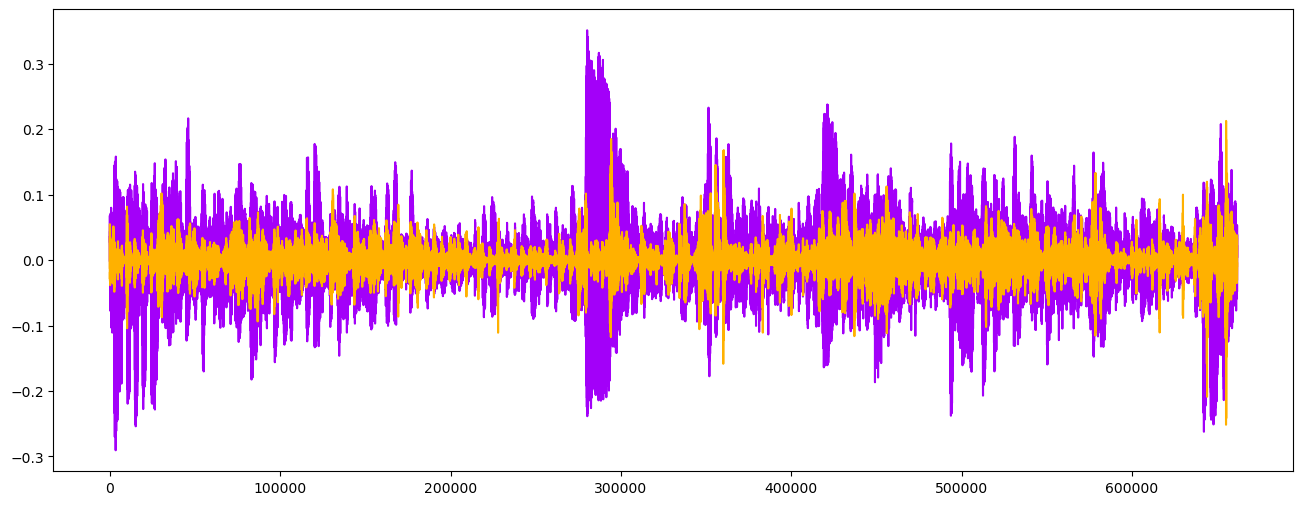

In [22]:
# Harmonics and Perceptrual
Y_harm , Y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16,6))
plt.plot(Y_harm , color = '#A300F9');
plt.plot(Y_perc , color = '#FFB100');
plt.show()

In [26]:
tempo, _ = librosa.beat.beat_track(y=y,sr = sr)
tempo

array([151.99908088])

In [ ]:
# Calculate the spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_file , sr = sr)[0]
# shape is a vector

print("Centroids: " , spectral_centroids , "\n")
print("Shape of Spectral Centroids: ", spectral_centroids.shape , '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:' , frames , "\n")
print('t:' , t)

# Function that Normalizes the Sound data
def normalize(x , axis = 0):
    return sklearn.preprocessing.minmax_scale(x, axis = axis)
